<a href="https://colab.research.google.com/github/anujsahani01/Drarf_ai/blob/main/Image_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [97]:
!unzip '/content/gdrive/MyDrive/img (1).zip' -d '/content/dataset'

In [8]:
import os
path = '/content/dataset/img'
cat = os.listdir(path)
print(cat)

['MEN', 'WOMEN']


In [9]:
import shutil
# shutil.rmtree('/content/dataset_new')
# shutil.rmtree('/content/final')

In [10]:
root_path = '/content/dataset_new'
os.mkdir(root_path)

In [11]:
men_cloths = []
women_cloths = []
for i in cat:
    if i == 'MEN':
        men_cloths.append(os.listdir(path + '/' + i))
    else:
        women_cloths.append(os.listdir(path + '/' + i))

In [12]:
print(men_cloths, '\n', women_cloths)

[['Jackets_Vests', 'Denim', 'Suiting', 'Shirts_Polos', 'Sweatshirts_Hoodies', 'Pants', 'Sweaters', 'Tees_Tanks', 'Shorts']] 
 [['Jackets_Coats', 'Skirts', 'Denim', 'Rompers_Jumpsuits', 'Graphic_Tees', 'Sweatshirts_Hoodies', 'Blouses_Shirts', 'Pants', 'Sweaters', 'Dresses', 'Tees_Tanks', 'Cardigans', 'Leggings', 'Shorts']]


In [13]:
path + '/' + cat[0]

'/content/dataset/img/MEN'

In [14]:
import cv2
import matplotlib.pyplot as plt

In [15]:
for dirs in men_cloths[0]:
    count = 1
    print(path + '/' + cat[0] + '/' + dirs)
    try:
      os.mkdir(root_path +  '/' + dirs + '/')
    except FileExistsError:
      pass
    for sub in os.listdir(path + '/' + cat[0] + '/' + dirs):
        for images in os.listdir(path + '/' + cat[0] + '/' + dirs + '/' + sub):
            img = cv2.imread(path + '/' + cat[0] + '/' + dirs + '/' + sub + '/' + images)
            final = root_path + '/' + dirs + '/' + str(count) + '.jpg'
            count = count + 1
            cv2.imwrite(final, img)

/content/dataset/img/MEN/Jackets_Vests
/content/dataset/img/MEN/Denim
/content/dataset/img/MEN/Suiting
/content/dataset/img/MEN/Shirts_Polos
/content/dataset/img/MEN/Sweatshirts_Hoodies
/content/dataset/img/MEN/Pants
/content/dataset/img/MEN/Sweaters
/content/dataset/img/MEN/Tees_Tanks
/content/dataset/img/MEN/Shorts


In [16]:
for dirs in women_cloths[0]:
    count = 10000
    print(path + '/' + cat[1] + '/' + dirs)
    try:
      os.mkdir(root_path +  '/' + dirs + '/')
    except FileExistsError:
      pass
    for sub in os.listdir(path + '/' + cat[1] + '/' + dirs):
        for images in os.listdir(path + '/' + cat[1] + '/' + dirs + '/' + sub):
            img = cv2.imread(path + '/' + cat[1] + '/' + dirs + '/' + sub + '/' + images)
            final = root_path + '/' + dirs + '/' + str(count) + '.jpg'
            count = count + 1
            cv2.imwrite(final, img)

/content/dataset/img/WOMEN/Jackets_Coats
/content/dataset/img/WOMEN/Skirts
/content/dataset/img/WOMEN/Denim
/content/dataset/img/WOMEN/Rompers_Jumpsuits
/content/dataset/img/WOMEN/Graphic_Tees
/content/dataset/img/WOMEN/Sweatshirts_Hoodies
/content/dataset/img/WOMEN/Blouses_Shirts
/content/dataset/img/WOMEN/Pants
/content/dataset/img/WOMEN/Sweaters
/content/dataset/img/WOMEN/Dresses
/content/dataset/img/WOMEN/Tees_Tanks
/content/dataset/img/WOMEN/Cardigans
/content/dataset/img/WOMEN/Leggings
/content/dataset/img/WOMEN/Shorts


In [17]:
import os
labels = os.listdir('/content/dataset_new')
print(len(labels))
print(labels)

17
['Jackets_Vests', 'Jackets_Coats', 'Skirts', 'Denim', 'Suiting', 'Shirts_Polos', 'Rompers_Jumpsuits', 'Graphic_Tees', 'Sweatshirts_Hoodies', 'Blouses_Shirts', 'Pants', 'Sweaters', 'Dresses', 'Tees_Tanks', 'Cardigans', 'Leggings', 'Shorts']


In [18]:
! pip install python_splitter

In [19]:
import os
import numpy as np
import shutil
import pandas as pd


def train_test_split():
  root_dir = '/content/final'
  processed_dir = '/content/dataset_new'
  classes_dir = labels
  val_ratio = 0.10
  test_ratio = 0.10

  for cls in classes_dir:
    # Creating partitions of the data after shuffeling
    src = processed_dir + "/" + cls  # Folder to copy images from
    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                            [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
                                                              int(len(allFileNames) * (1 - val_ratio)),
                                                              ])
    train_FileNames = [src + '//' + name for name in train_FileNames.tolist()]
    val_FileNames = [src + '//' + name for name in val_FileNames.tolist()]
    test_FileNames = [src + '//' + name for name in test_FileNames.tolist()]

    print('Total images: '+ str(len(allFileNames)))
    print('Training: '+ str(len(train_FileNames)))
    print('Validation: '+  str(len(val_FileNames)))
    print('Testing: '+ str(len(test_FileNames)))

    # # Creating Train / Val / Test folders (One time use)
    os.makedirs(root_dir + '/train/' + cls)
    os.makedirs(root_dir + '/val/' + cls)
    os.makedirs(root_dir + '/test/' + cls)

    # Copy-pasting images
    for name in train_FileNames:
      shutil.copy(name, root_dir + '/train/' + cls)

    for name in val_FileNames:
      shutil.copy(name, root_dir + '/val/' + cls)

    for name in test_FileNames:
        shutil.copy(name, root_dir + '/test/' + cls)

train_test_split()

Total images: 424
Training: 339
Validation: 42
Testing: 43
Total images: 1895
Training: 1516
Validation: 189
Testing: 190
Total images: 2045
Training: 1636
Validation: 204
Testing: 205
Total images: 804
Training: 643
Validation: 80
Testing: 81
Total images: 39
Training: 31
Validation: 4
Testing: 4
Total images: 722
Training: 577
Validation: 72
Testing: 73
Total images: 1696
Training: 1356
Validation: 170
Testing: 170
Total images: 1297
Training: 1037
Validation: 130
Testing: 130
Total images: 1631
Training: 1304
Validation: 163
Testing: 164
Total images: 7964
Training: 6371
Validation: 796
Testing: 797
Total images: 2821
Training: 2256
Validation: 282
Testing: 283
Total images: 3641
Training: 2912
Validation: 364
Testing: 365
Total images: 6999
Training: 5599
Validation: 700
Testing: 700
Total images: 14487
Training: 11589
Validation: 1449
Testing: 1449
Total images: 1436
Training: 1148
Validation: 144
Testing: 144
Total images: 335
Training: 268
Validation: 33
Testing: 34
Total images

In [20]:
import tensorflow
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models

In [21]:
train_folder = '/content/final/train'
test_folder = '/content/final/test'
val_folder = '/content/final/val'

In [77]:
batch_size = 64
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 50

train_datagen = ImageDataGenerator(rescale=1.0 / 255.0,
                                   shear_range=0.2,
                                   vertical_flip=True,
                                   rotation_range=10,
                                   zoom_range=0.3)

training_dataset = train_datagen.flow_from_directory(train_folder,
                                                     classes= labels,
                                                     shuffle=True,
                                                     batch_size= batch_size,
                                                     target_size=(image_size, image_size))

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0,
                                  shear_range=0.2,
                                   vertical_flip=True,
                                   rotation_range=10,
                                   zoom_range=0.3)


test_dataset = test_datagen.flow_from_directory(test_folder,
                                                classes= labels,
                                                shuffle=False,
                                                batch_size= batch_size,
                                                target_size=(image_size, image_size))


val_datagen = ImageDataGenerator(rescale=1.0 / 255.0,
                                 shear_range=0.2,
                                   vertical_flip=True,
                                   rotation_range=10,
                                   zoom_range=0.3)


val_dataset = test_datagen.flow_from_directory(val_folder,
                                               classes= labels,
                                               shuffle=False,
                                               batch_size= batch_size,
                                               target_size=(image_size, image_size))

Found 42162 images belonging to 17 classes.
Found 5280 images belonging to 17 classes.
Found 5270 images belonging to 17 classes.


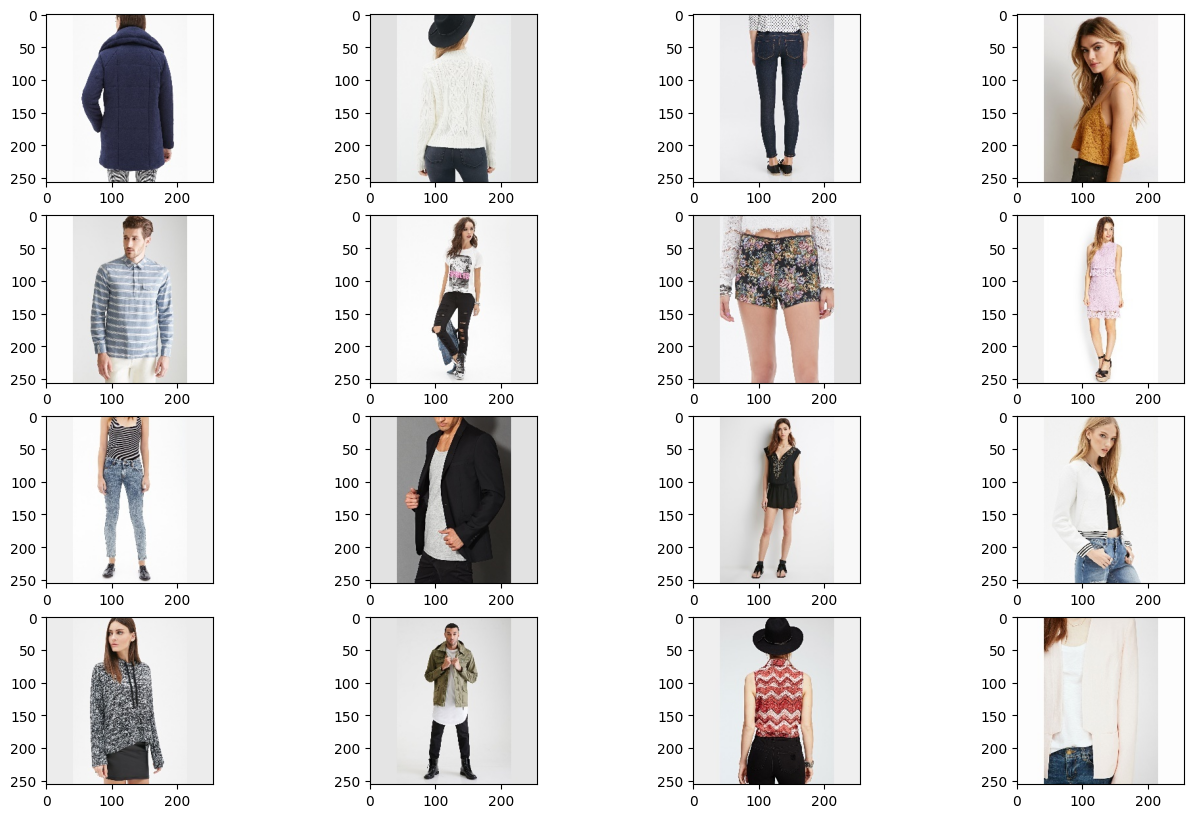

In [78]:
import random
import matplotlib.pyplot as plt
import cv2

dir = test_folder
fig, axes = plt.subplots(4, 4, figsize = (16,10))
axes = axes.ravel()
for i in range(0, 16):
  class_dir = os.path.join(dir)
  lbl = random.choice(os.listdir(class_dir))
  image = random.choice(os.listdir(os.path.join(class_dir, lbl)))
  img = plt.imread(os.path.join(class_dir, lbl, image))
  axes[i].imshow(img)

In [79]:
image_size = 50
channels = 3
input_shape=(image_size, image_size, channels)
n_classes=17

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)#include top -> last layer will not execute
base_model.trainable = False ## Not trainable weights

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [80]:
flatten_layer = layers.Flatten()
# dense_layer_1 = layers.Dense(128, activation='relu')
dropout_1 = layers.Dropout(0.4)
dense_layer_2 = layers.Dense(64)
dropout_2 = layers.Dropout(0.2)
prediction_layer = layers.Dense(17, activation='softmax')

In [81]:
model = models.Sequential([
    base_model,
    flatten_layer,
    # dense_layer_1,
    dropout_1,
    dense_layer_2,
    dropout_1,
    prediction_layer
])

In [82]:
learning_rate = 0.1
epochs = 20
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.01)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [83]:
history = model.fit_generator(
    training_dataset,
    epochs = 20,
    verbose = 1,
    steps_per_epoch = 100,
    validation_data = val_dataset)

<ipython-input-83-35b187737141>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 24s 224ms/step - loss: 3.0457 - accuracy: 0.1644 - val_loss: 2.4108 - val_accuracy: 0.2738
Epoch 2/20
100/100 [==============================] - 24s 240ms/step - loss: 2.7806 - accuracy: 0.2044 - val_loss: 2.3296 - val_accuracy: 0.2750
Epoch 3/20
100/100 [==============================] - 23s 231ms/step - loss: 2.6758 - accuracy: 0.2033 - val_loss: 2.2915 - val_accuracy: 0.2770
Epoch 4/20
100/100 [==============================] - 23s 232ms/step - loss: 2.6179 - accuracy: 0.2086 - val_loss: 2.2722 - val_accuracy: 0.2744
Epoch 5/20
100/100 [==============================] - 23s 230ms/step - loss: 2.5551 - accuracy: 0.2189 - val_loss: 2.2538 - val_accuracy: 0.2814
Epoch 6/20
100/100 [==============================] - 23s 227ms/step - loss: 2.5298 - accuracy: 0.2309 - val_loss: 2.2452 - val_accuracy: 0.2797
Epoch 7/20
100/100 [==============================] - 23s 231ms/step - loss: 2.5110 - accuracy: 0.2286 - val_loss: 2.2344 - val_ac

In [84]:
from keras.applications.imagenet_utils import decode_predictions, preprocess_input

In [85]:
predictions = model.predict(test_dataset)

83/83 [==============================] - 11s 127ms/step


In [86]:
# # print out the
# for _, pred, prob in decode_predictions(predictions)[0]:
#     print("predicted %s with probability %0.3f" % (pred, prob))

In [87]:
import random

In [88]:
images_path = '/content/final/train'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(range(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 10000 images to analyze


In [89]:
import numpy as np
import matplotlib.pyplot as plt
# from keras.preprocessing import image
import keras.utils as image



def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [90]:
import time
tic = time.process_time()


features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.process_time()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.process_time()
    img, x = load_image(image_path);
    feat = model.predict(x , verbose = 0)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

analyzing image 0 / 10000. Time: 0.0001 seconds.
analyzing image 500 / 10000. Time: 27.9137 seconds.
analyzing image 1000 / 10000. Time: 29.8574 seconds.
analyzing image 1500 / 10000. Time: 28.1270 seconds.
analyzing image 2000 / 10000. Time: 27.6603 seconds.
analyzing image 2500 / 10000. Time: 29.2637 seconds.
analyzing image 3000 / 10000. Time: 28.3227 seconds.
analyzing image 3500 / 10000. Time: 30.2476 seconds.
analyzing image 4000 / 10000. Time: 27.8493 seconds.
analyzing image 4500 / 10000. Time: 29.2436 seconds.
analyzing image 5000 / 10000. Time: 29.1392 seconds.
analyzing image 5500 / 10000. Time: 28.3862 seconds.
analyzing image 6000 / 10000. Time: 29.3316 seconds.
analyzing image 6500 / 10000. Time: 28.6775 seconds.
analyzing image 7000 / 10000. Time: 29.2187 seconds.
analyzing image 7500 / 10000. Time: 30.4932 seconds.
analyzing image 8000 / 10000. Time: 28.4583 seconds.
analyzing image 8500 / 10000. Time: 29.5263 seconds.
analyzing image 9000 / 10000. Time: 28.6356 seconds

In [91]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=4)
pca.fit(features)

PCA(n_components=4)

In [92]:
pca_features = pca.transform(features)

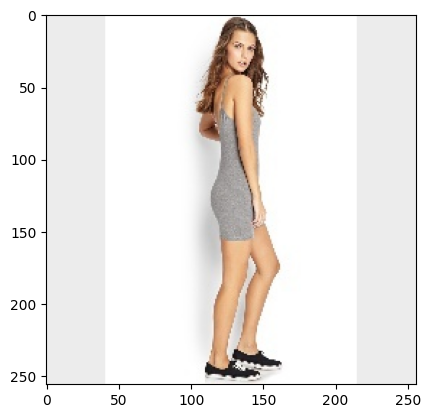

In [93]:
import random

# grab a random query image
query_image_idx = int(len(images) * random.random())

# let's display the image
img = image.load_img(images[query_image_idx])
plt.imshow(img)

In [94]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]

In [95]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:5]

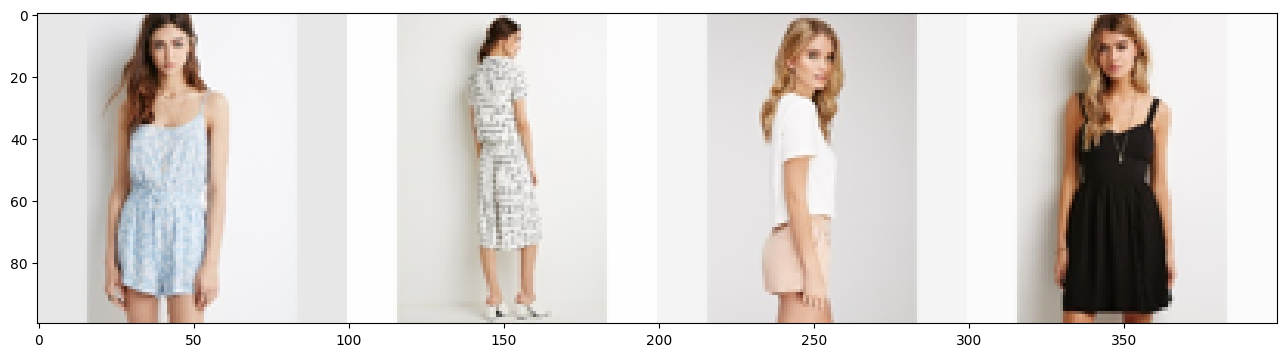

In [96]:
# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)